# Introduction to Algorithm analysis and Big "O"

## Why Algorithm Analysis

Before we begin, let's clarify what an algorthim is. In this course, an algorithm is simply a procedure or formula for solving a problem. Some problems are famous enough that the algorithms have names, as well as some procdures being common enough that the algorithm associated with it also has a name. So now we have a good question we need to answer:

**How do analyze algorithms and how can we compare algorithms against each other?**

Imagine if you and a friend both came up with functions to sum the numbers from 0 to N. How would you compare the functions and algorithms within the functions? Let's say you both cam up with these two seperate functions:

In [ ]:
def sum1(n):
  '''
  Take the input n and the return the sum of numbers from 0 to n
  '''
  final_sum = 0
  for x in range(n+1):
    final_sum += x
  return final_sum



In [ ]:
sum1(10)

55

In [ ]:
def sum2(n):
  '''
  Take input n and return the sum of numbers from 0 to n
  '''
  return (n*(n+1)/2)

In [ ]:
sum2(10)

55.0

You'll notice both functions have the same result, but completely different algorithms. You'll note that the first function iteratively adds the numbers, while the second function makes use of:

∑i=0ni=n(n+1)2

So how can we objectively compare the algorithms? We could compare the amount of space they take in memory or we could also compare how much time it takes each function to run.

Let's go ahead and compare the time it took to run the functions:

In [ ]:
%timeit sum1(100)

100000 loops, best of 3: 4.03 µs per loop


The slowest run took 5.15 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 4.86 µs per loop

In [ ]:
%timeit sum2(100)

The slowest run took 17.41 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 117 ns per loop


The slowest run took 16.54 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 173 ns per loop
We can see that the second function is much more efficient! Running at a much faster rate than the first. However, we can not use "time to run" as an objective measurement, because that will depend on the speed of the computer itself and hardware capabilities. So we will need to use another method, **Big-O!**

## Big-O notation

Big-O notation describe how quickly runtime grow relatively to the input as the input get arbitrarily large.

Now we want to develop a notation to objectively compare the efficiency of these two algorithms. A good place to start would be to compare the number of assignments each algorithm makes.

The original sum1 function will create an assignment n+1 times, we can see this from the range based function. This means it will assign the final_sum variable n+1 times. We can then say that for a problem of n size (in this case just a number n) this function will take 1+n steps.

This n notation allows us to compare solutions and algorithms relative to the size of the problem, since sum1(10) and sum1(100000) would take very different times to run but be using the same algorithm. We can also note that as n grows very large, the +1 won't have much effect. So let's begin discussing how to build a syntax for this notation.

*Now we will discuss how we can formalize this notation and idea.*

Big-O notation describes how quickly runtime will grow relative to the input as the input get arbitrarily large.

**Let's examine some of these points more closely:**

Remember, we want to compare how quickly runtime will grows, not compare 

*   Remember, we want to compare how quickly runtime will grows, not compare exact runtimes, since those can vary depending on hardware.
*   Since we want to compare for a variety of input sizes, we are only concerned with runtime grow relative to the input. This is why we use n for notation.
*   As n gets arbitrarily large we only worry about terms that will grow the fastest as n gets large, to this point, Big-O analysis is also known as **asymptotic analysis**

As for syntax sum1() can be said to be **O(n)** since its runtime grows linearly with the input size. In the next lecture we will go over more specific examples of various O() types and examples. To conclude this lecture we will show the potential for vast difference in runtimes of Big-O functions.



### Runtimes of Common Big-O Functions


Here is a table of common Big-O functions:

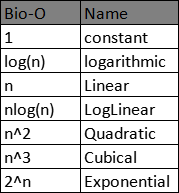

Now let's plot the runtime versus the Big-O to compare the runtimes. We'll use a simple matplotlib for the plot below.


Text(0.5, 0, 'n')

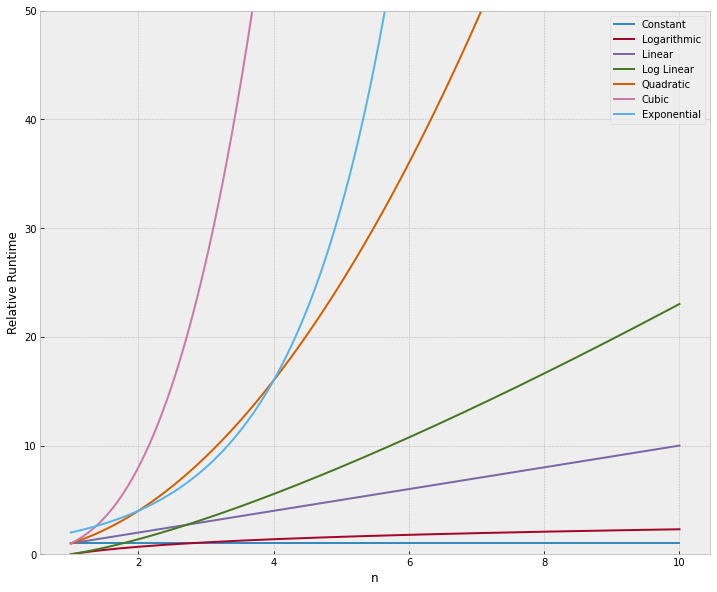

In [ ]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Set up runtime comparisons
n = np.linspace(1,10,1000)
labels = ['Constant','Logarithmic','Linear','Log Linear','Quadratic','Cubic','Exponential']
big_o = [np.ones(n.shape),np.log(n),n,n*np.log(n),n**2,n**3,2**n]

# Plot setup
plt.figure(figsize=(12,10))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label = labels[i])


plt.legend(loc=0)
plt.ylabel('Relative Runtime')
plt.xlabel('n')

Note how much of a difference a Big-O efficiency can make for the same n value against the projected runtime! Clearly we want to choose algorithms that stay away from any exponential, quadratic, or cubic behavior!

## Big-O Example

### O(1) Constant

In [ ]:
def fun_constant(values):
  '''
  Print the first item in a list of values.
  '''
  print(values[0])

In [ ]:
fun_constant([1,2,3,4])

1


This funstion is constant regardless of the list size. The function will only take a constant step size in this case 1, printing the first value from the list.
So we can see here that an list of 100 values will print 1, list 10,000 values will print 1 and a list of **n** value will also print 1 item!

### O(n) Linear

In [ ]:
def fun_linear(values):
  '''
  Print all the values in the list
'''
  for x in values:
    print(x)

In [ ]:
fun_linear([1,2,3,4,5])

1
2
3
4
5


This function runs O(n) linear time. This means that the number of operation taking place scales linearly with n, So we can see here that an input list of 100 values will print 100 times, 10,000 list of values will print 10,000 times and **n** number of values will print **n** times. 

### O(n^2) Quadratic

In [ ]:
def fun_Quadratic(values):
  '''
  This will print pairs of every items in the list
  '''
  for x in values:
    for y in values:
      print(x, y)

In [ ]:
fun_Quadratic([1,2,3])

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


Note how we now have two loops, one nested inside another. This means that for a list of n items, we will have to perform n operations for every item in the list! This means in total, we will perform n times n assignments, or n^2. So a list of 10 items will have 10^2, or 100 operations. You can see how dangerous this can get for very large inputs! This is why Big-O is so important to be aware of!

### O(n^3) Cubical

In [ ]:
def fun_cubical(values):
  '''
  This will print the value 3 times
  '''
  for x in values:
    for y in values:
      for z in values:
        print(x,y,z)

In [ ]:
fun_cubical([1,2])

1 1 1
1 1 2
1 2 1
1 2 2
2 1 1
2 1 2
2 2 1
2 2 2


Note now we have 3 loops nested inside one another.so, a list of 10 values will have 10^3 which is 1000 operation!

### log(n) Logarithmic

An algorithm is said to have a logarithmic time complexity when it reduces the size of the input data in each step (it don’t need to look at all values of the input data), for example:

In [ ]:
def fun_logarithmic(values):
  '''
range(start, stop, step)
start	Optional. An integer number specifying at which position to start. Default is 0
stop	Required. An integer number specifying at which position to stop (not included).
step	Optional. An integer number specifying the incrementation. Default is 1
  '''
  for x in range(0,len(values),4):
    print(x)

In [ ]:
fun_logarithmic([1,2,3,4,5])

0
4


Here based on the inputes number of operations decrease. Algorithmic operations are commonly found in binary trees or when using binary search.

### nlog(n) Log linear

In [ ]:
def fun_logLinear(values):
  for x in values: # performs O(n) operations!
    for y in range(x,len(values),4): # perform O(log(n)) operations!
      print(x,y)

In [ ]:
fun_logLinear([1,2,3,4,5,6])

1 1
1 5
2 2
3 3
4 4
5 5


### O(2^n) exponential

Recursion calculation is an example of O(2^n) exponential notation

In [ ]:
def fun_exponential(value):
  if value <=1:
    return 1
  else:
    return fun_exponential(value -2) + fun_exponential(value -1)
    

In [ ]:
fun_exponential(6)

13

## Calculating Scale of Big-O

When it comes to Big O notation we only care about the most significant terms, remember as the input grows larger only the fastest growing terms will matter. If you've taken a calculus class before, this will reminf you of taking limits towards infinity. Let's see an example of how to drop constants:

In [ ]:
def print_once(lst):
    '''
    Prints all items once
    '''
    for val in lst:
        print(val)

In [ ]:
print_once([1,2,3,4,5,6])

1
2
3
4
5
6


The print_once() function is O(n) since it will scale linearly with the input. What about the next example?

In [ ]:
def print_3(lst):
    '''
    Prints all items three times
    '''
    for val in lst:
        print(val)
        
    for val in lst:
        print(val)
        
    for val in lst:
        print(val)

In [ ]:
print_3([1,2,3,4])

1
2
3
4
1
2
3
4
1
2
3
4


We can see that the first function will print O(n) items and the second will print O(3n) items. However for n going to inifinity the constant can be dropped, since it will not have a large effect, so both functions are O(n).

Let's see a more complex example of this:

In [ ]:
def comp(lst):
    '''
    This function prints the first item O(1)
    Then is prints the first 1/2 of the list O(n/2)
    Then prints a string 10 times O(10)
    '''
    print(lst[0])
    
    midpoint = len(lst)/2
    for val in range(lst[int(midpoint)]):
        print(val)
        
    for x in range(10):
        print('number')

In [ ]:
comp([1,2,3])

1
0
1
number
number
number
number
number
number
number
number
number
number


So let's break down the operations here. We can combine each operation to get the total Big-O of the function:



> O(1+n/2+10)



We can see that as n grows larger the 1 and 10 terms become insignificant and the 1/2 term multiplied against n will also not have much of an effect as n goes towards infinity. This means the function is simply O(n)!

## Worst Case vs Best Case

Many times we are only concerned with the worst possible case of an algorithm, but in an interview setting its important to keep in mind that worst case and best case scenarios may be completely different Big-O times. For example, consider the following function:

In [ ]:
def matcher(lst,match):
    '''
    Given a list lst, return a boolean indicating if match item is in the list
    '''
    for item in lst:
        if item == match:
            return True
    return False

In [ ]:
lst =[1,2,3,4,5,6,7,8]
matcher(lst,1)

True

In [ ]:
lst =[1,2,3,4,5,6,7,8]
matcher(lst,12)

False

Note that in the first scenario, the best case was actually O(1), since the match was found at the first element. In the case where there is no match, every element must be checked, this results in a worst case time of O(n). Later on we will also discuss average case time.


## Space Complexity

Many times we are also concerned with how much memory/space an algorithm uses. The notation of space complexity is the same, but instead of checking the time of operations, we check the size of the allocation of memory.

Let's see a few examples:

In [ ]:
def printer(n):
    '''
    Prints "hello world!" n times
    '''
    for x in range(n):
        print('Hello World!')

In [ ]:
printer(10)

Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!
Hello World!


Note how we only assign the 'hello world!' variable once, not every time we print. So the algorithm has O(1) space complexity and an O(n) time complexity.

Let's see an example of O(n) space complexity:

In [ ]:
def create_list(n):
    new_list = []
    
    for num in range(n):
        new_list.append("new" + str(num))
    
    return new_list

In [ ]:
create_list(10)

['new0',
 'new1',
 'new2',
 'new3',
 'new4',
 'new5',
 'new6',
 'new7',
 'new8',
 'new9']

Note how the size of the new_list object scales with the input n, this shows that it is an O(n) algorithm with regards to space complexity.

# Big O for Python Data Structures

## Lists

In Python lists act as **dynamic arrays** and support a number of common operations through methods called on them. The two most common operations performed on a list are **indexing** and **assigning to an index position**. These operations are both designed to be run in constant time, O(1).

Let's imagine you wanted to test different methods to construct a list that is [0,1,2...10000]. Let go ahead and compare various methods, such as appending to the end of a list, concatenating a list, or using tools such as casting and list comprehension.

For example:

In [ ]:
def method1():
    l = []
    for n in range(10000):
        l = l + [n]

def method2():
    l = []
    for n in range(10000):
        l.append(n)

def method3():
    l = [n for n in range(10000)]

def method4():
    l = range(10000) # Python 3: list(range(10000))

In [ ]:
%timeit method1()
%timeit method2()
%timeit method3()
%timeit method4()

1 loop, best of 3: 197 ms per loop
1000 loops, best of 3: 771 µs per loop
1000 loops, best of 3: 407 µs per loop
The slowest run took 7.05 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 308 ns per loop


We can clearly see that the most effective method is the built-in range() function in Python!

It is important to keep these factors in mind when writing efficient code. More importantly begin thinking about how we are able to index with O(1). We will discuss this in more detail when we cover arrays general. For now, take a look at the table below for an overview of Big-O efficiencies.

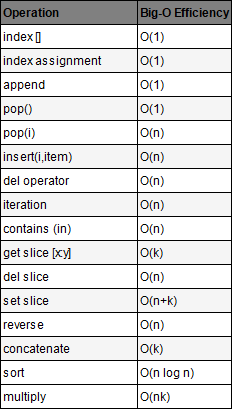

In [ ]:
def listOperation(values, selm, indx, ielm):
    '''
    This method will perfomr all the list operations
    
    '''
    lst = list(values) #values conert to list

    #print the index of an element
    try:
      print(f"Index of element {selm} is {lst.index(int(selm))} ")
    except ValueError:
      print(f"{selm} is not present in the list ")

    # insert an element into the list
    print(f"\nInsert {ielm} into the list")
    lst.insert(indx,ielm) # insert value into 0th index
    print(f"After inserting the list is {lst}")

    #append element into the list
    print(f"\nAppend {20} into the list")
    lst.append(20) # append value to the list
    print(f"After appendidng the list is {lst}") 

    #Delete element into the list
    print(f"\nDelete index value {indx} from the list")
    lst.pop(indx) # delete value index 2 from  the list
    print(f"After deleting the list is {lst}")
    
    #Delete element into the list
    print(f"\nDelete last value from the list")
    lst.pop() # delete last value from  the list
    print(f"After deleting the list is {lst}")

    #Delete element into the list
    print(f"\nDelete last value from the list using del statement")
    del lst[-1] # delete last value from  the list
    print(f"After deleting the list is {lst}")

    #Slice element into the list
    print(f"\nSlice value from the list")
    del lst[0:2:1] # You can also specify step as [start:stop:step].
    print(f"After deleting the list is {lst}") 

    #Count how many elements are present
    print(f"\nCount {5} present in the list  {lst.count(5)} time") 


In [ ]:
listOperation([1,2,3,4,5,6],9,0,12)

9 is not present in the list 

Insert 12 into the list
After inserting the list is [12, 1, 2, 3, 4, 5, 6]

Append 20 into the list
After appendidng the list is [12, 1, 2, 3, 4, 5, 6, 20]

Delete index value 0 from the list
After deleting the list is [1, 2, 3, 4, 5, 6, 20]

Delete last value from the list
After deleting the list is [1, 2, 3, 4, 5, 6]

Delete last value from the list using del statement
After deleting the list is [1, 2, 3, 4, 5]

Slice value from the list
After deleting the list is [3, 4, 5]

Count 5 present in the list  1 time


## Dictionaries

In [ ]:
d = {'k1':1,'k2':2}
d['k1']

1

Something that is pretty amazing is that getting and setting items in a dictionary are O(1)! Hash tables are designed with efficiency in mind, and we will explore them in much more detail later on in the course as one of the most important data structures to undestand. In the meantime, refer to the table below for Big-O efficiencies of common dictionary operations:

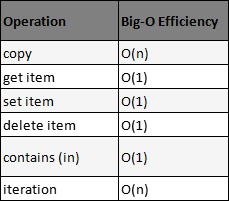